In [62]:
import numpy as np
import pandas as pd
from tp2_aux import *
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
df=pd.read_csv("Features/18_feat.csv")
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1566.769060,256.972330,134.894370,0.426019,-78.217932,42.341686,-37.787903,-42.888317,-14.046809,82.606770,-47.571213,-24.359087,-3542.154360,985.098659,903.368859,-279.365740,15.216278,1308.514337
1,-1096.790534,-259.430886,281.108187,140.738997,486.227893,337.644196,1.410045,11.822192,-18.662693,6.815238,-5.977649,-8.942019,-3150.522163,-585.940269,-2.799616,542.739056,655.008573,813.251967
2,-1899.446655,-88.054010,188.661907,18.248094,11.087848,-351.700143,-10.285537,11.172274,-9.697616,10.255277,-9.077256,3.854660,-4943.865828,85.856124,1168.851605,-150.175123,-407.711430,1107.826303
3,-1102.846546,-258.014865,-215.959254,-175.718687,-118.137098,-17.879879,-1.429744,14.860696,2.637629,-6.988448,2.984794,-5.144351,-2305.977768,-639.373716,1613.985828,545.090482,-606.680737,76.015657
4,-1713.854832,-441.738621,-58.189245,111.578252,86.091565,105.244246,2.971443,22.001347,4.052695,1.980236,2.067019,4.380383,-3927.758208,-839.460439,468.031497,-7.458701,613.825335,994.550631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,766.613222,-693.642377,1191.752009,43.696738,195.631394,-181.278654,2.521352,-9.036278,21.745676,12.352134,2.101766,-1.666548,2725.343066,720.793744,2993.162516,288.839247,961.556475,-839.706573
559,-1446.305757,440.792017,555.953577,349.492057,-388.080537,1224.616940,-14.846062,10.160840,-11.543192,8.230391,4.640935,3.757771,-4475.871424,1152.987403,464.334553,-449.903017,371.217944,588.210993
560,-1607.762033,-339.039538,471.903398,266.075891,42.670463,243.078407,-4.180580,25.314545,2.433371,7.970274,9.019488,-2.786480,-4567.669782,36.818054,349.974142,390.581761,423.216752,1478.428098
561,200.021657,-567.829972,950.199753,125.972651,-700.379938,-788.108299,9.100142,-10.795569,4.642158,13.985149,-14.645111,5.775489,3365.305026,-210.677432,2250.280500,-709.276808,-544.573532,-313.341049


In [3]:
labels=np.loadtxt("labels.txt",delimiter=",")
df["labels"]=labels[:,1].astype(int)


### Feature Selection (ANOVA F-Test)

In [4]:

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_new = SelectKBest(f_classif, k=8).fit_transform(X, y) #5 features, might change depending on results

In [5]:
df_ufilter=pd.DataFrame(X_new)
df_ufilter

,0,1,2,3,4,5
0,-1566.769060,256.972330,134.894370,-3542.154360,985.098659,15.216278
1,-1096.790534,-259.430886,281.108187,-3150.522163,-585.940269,655.008573
2,-1899.446655,-88.054010,188.661907,-4943.865828,85.856124,-407.711430
3,-1102.846546,-258.014865,-215.959254,-2305.977768,-639.373716,-606.680737
4,-1713.854832,-441.738621,-58.189245,-3927.758208,-839.460439,613.825335
...,...,...,...,...,...,...
558,766.613222,-693.642377,1191.752009,2725.343066,720.793744,961.556475
559,-1446.305757,440.792017,555.953577,-4475.871424,1152.987403,371.217944
560,-1607.762033,-339.039538,471.903398,-4567.669782,36.818054,423.216752
561,200.021657,-567.829972,950.199753,3365.305026,-210.677432,-544.573532


In [6]:
df_ufilter["label"]=y
df_ufilter

,0,1,2,3,4,5,label
0,-1566.769060,256.972330,134.894370,-3542.154360,985.098659,15.216278,0
1,-1096.790534,-259.430886,281.108187,-3150.522163,-585.940269,655.008573,0
2,-1899.446655,-88.054010,188.661907,-4943.865828,85.856124,-407.711430,0
3,-1102.846546,-258.014865,-215.959254,-2305.977768,-639.373716,-606.680737,0
4,-1713.854832,-441.738621,-58.189245,-3927.758208,-839.460439,613.825335,0
...,...,...,...,...,...,...,...
558,766.613222,-693.642377,1191.752009,2725.343066,720.793744,961.556475,0
559,-1446.305757,440.792017,555.953577,-4475.871424,1152.987403,371.217944,0
560,-1607.762033,-339.039538,471.903398,-4567.669782,36.818054,423.216752,0
561,200.021657,-567.829972,950.199753,3365.305026,-210.677432,-544.573532,0


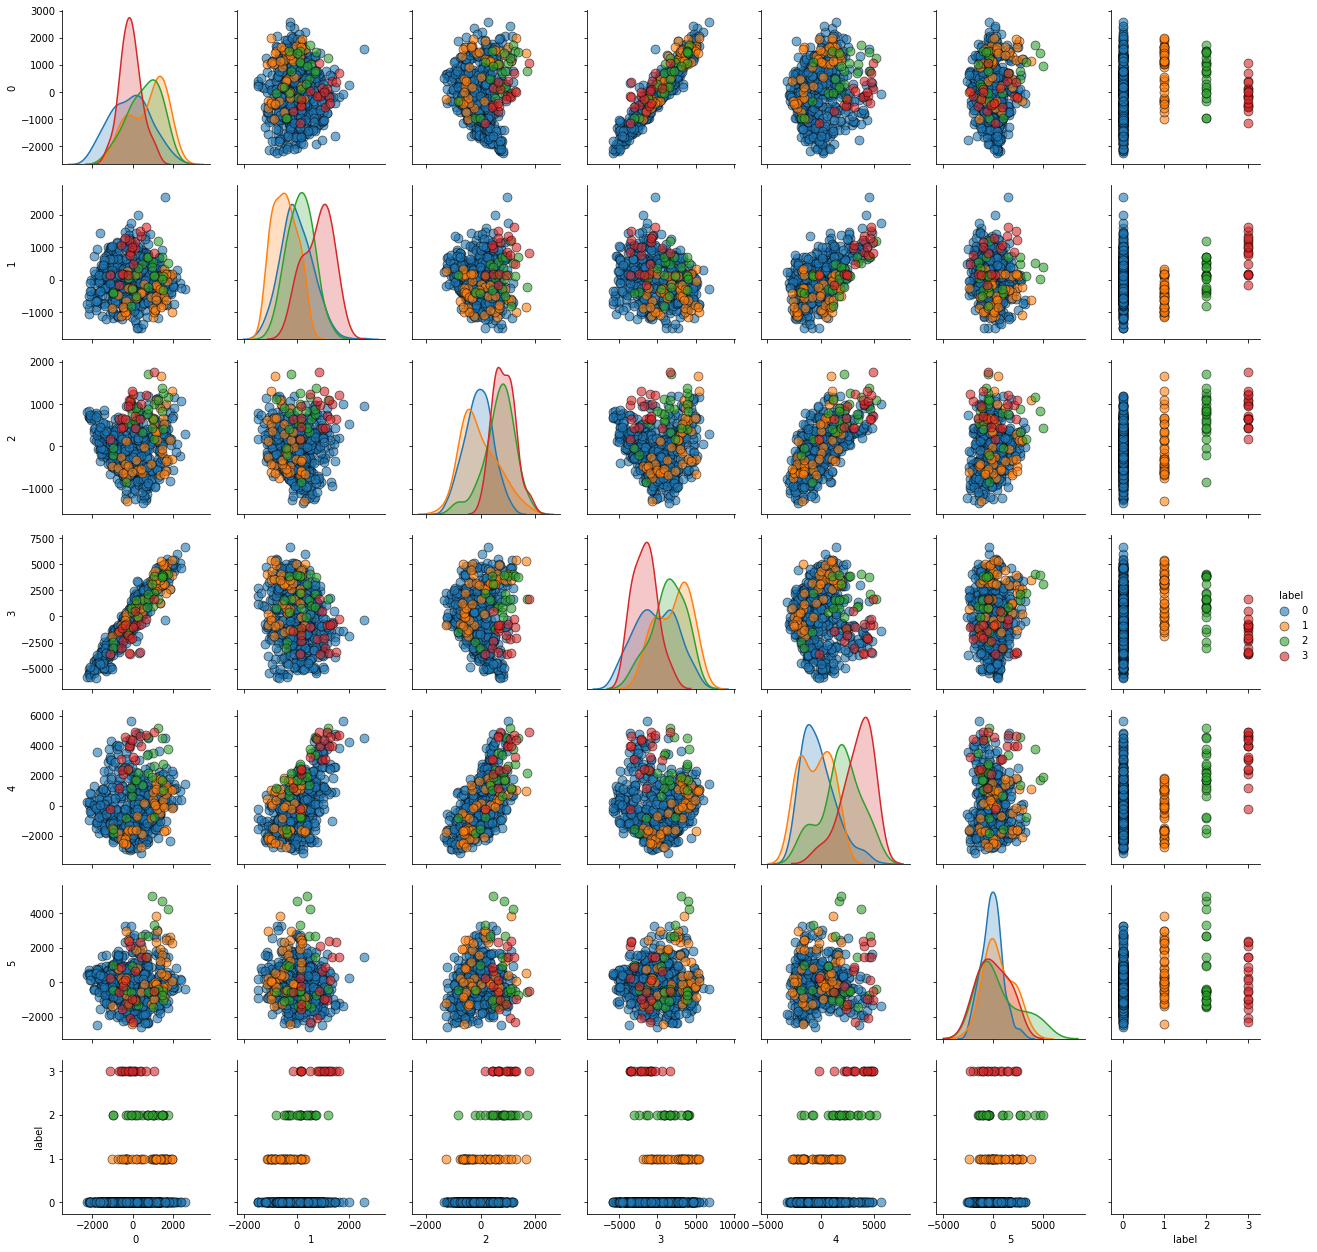

In [29]:
import seaborn as sns
sns.pairplot(df_ufilter,hue="label", diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'});

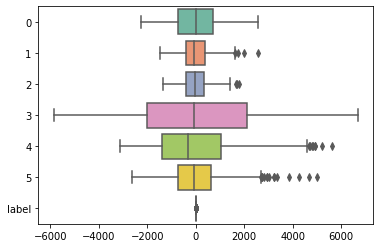

In [32]:
sns.boxplot(data=df_ufilter, orient="h", palette="Set2");

### Recursive Feature extraction using suport vector classification
(If they are easy to classify they are easy to cluster)

# Clustering

In [8]:
X=df_ufilter.iloc[:,:-1]
X

,0,1,2,3,4,5
0,-1566.769060,256.972330,134.894370,-3542.154360,985.098659,15.216278
1,-1096.790534,-259.430886,281.108187,-3150.522163,-585.940269,655.008573
2,-1899.446655,-88.054010,188.661907,-4943.865828,85.856124,-407.711430
3,-1102.846546,-258.014865,-215.959254,-2305.977768,-639.373716,-606.680737
4,-1713.854832,-441.738621,-58.189245,-3927.758208,-839.460439,613.825335
...,...,...,...,...,...,...
558,766.613222,-693.642377,1191.752009,2725.343066,720.793744,961.556475
559,-1446.305757,440.792017,555.953577,-4475.871424,1152.987403,371.217944
560,-1607.762033,-339.039538,471.903398,-4567.669782,36.818054,423.216752
561,200.021657,-567.829972,950.199753,3365.305026,-210.677432,-544.573532


## DBSCAN

In [13]:
clustering = DBSCAN(eps=0.01, min_samples=5).fit(X)
clustering.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

## K-Means

In [51]:
k=4
kmeans = KMeans(n_clusters=k).fit(X)
klab=kmeans.labels_
silhouette_score(X, klab, metric='euclidean')

0.3119686915716149

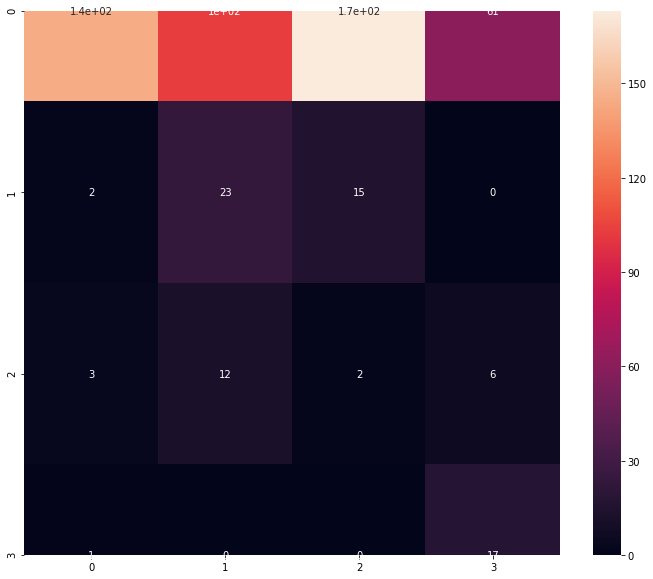

In [60]:
cm=confusion_matrix(y, klab)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True)

## Precision and recall

In [70]:
from sklearn.metrics import precision_recall_fscore_support
Precision,recall,fscore,sup=precision_recall_fscore_support(y, klab)
print(Precision)
print(recall)

[0.9602649  0.16666667 0.01052632 0.20238095]
[0.30082988 0.575      0.08695652 0.94444444]


### adjusted random score

In [63]:
adjusted_rand_score(y,klab)

0.03571750668390207